# Hypothesis Testing

Now that our data is clean, we can start asking questions about it. Let's import the clean data and take a look.

## Import Packages and Read in Data

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower

In [2]:
df = pd.read_csv('clean_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head()

,grade,male,preschool,expectBachelors,motherHS,motherWork,fatherHS,fatherWork,selfBornUS,motherBornUS,...,urban,schoolSize,readingScore,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
0,9,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1233.0,554.81,0,0,0,0,0,0,1
1,10,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,2640.0,458.11,0,0,1,0,0,0,0
2,10,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1,1095.0,613.89,0,0,0,1,0,0,0
3,10,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,1913.0,439.36,0,0,0,0,0,0,1
4,9,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1,502.0,428.96,0,0,0,0,0,0,1


## Observations

This data provides a lot of categorical features we can test with! Here are a few that stood out to us:
#### Students with working parents vs non working parents:

In [4]:
working_parent_df = df[(df['fatherWork']==1) | (df['motherWork']==1)]
unemployed_parents_df = df[(df['fatherWork']==0) & (df['motherWork']==0)]

print(f"Mean reading score of students with a working parent: {round(working_parent_df['readingScore'].mean(),2)}")
print(f"Mean reading score of students with unemployed parents: {round(unemployed_parents_df['readingScore'].mean(),2)}")            

Mean reading score of students with a working parent: 524.81
Mean reading score of students with unemployed parents: 495.77


#### Students who speak english at home vs those who do not:

In [5]:
english_home_df = df[(df['englishAtHome']==1)]
non_english_home_df = df[(df['englishAtHome']==0)]

print(f"Mean reading score of students who speaks english at home: {round(english_home_df['readingScore'].mean(),2)}")
print(f"Mean reading score of students who doesn't speak english at home: {round(non_english_home_df['readingScore'].mean(),2)}")

Mean reading score of students who speaks english at home: 527.25
Mean reading score of students who doesn't speak english at home: 494.63


#### Students with a parent that graduated high school vs those without one:

In [6]:
hs_diploma_parent = df[(df['fatherHS']==1) | (df['motherHS']==1)]
no_hs_diploma_parents = df[(df['fatherHS']==0) & (df['motherHS']==0)]

print(f"Mean reading score of students with a parent who graduated high school: {round(hs_diploma_parent['readingScore'].mean(),2)}")
print(f"Mean reading score of students without a parent who graduated high school: {round(no_hs_diploma_parents['readingScore'].mean(),2)}")

Mean reading score of students with a parent who graduated high school: 526.37
Mean reading score of students without a parent who graduated high school: 478.93


#### Students who attend public school vs those who don't:

In [7]:
public_school = df[(df['publicSchool']==1)]
non_public_school = df[(df['publicSchool']==0)]

print(f"Mean reading score of students who attend public school: {round(public_school['readingScore'].mean(),2)}")
print(f"Mean reading score of students who don't attend public school: {round(non_public_school['readingScore'].mean(),2)}")

Mean reading score of students who attend public school: 520.63
Mean reading score of students who don't attend public school: 551.61


#### Students with a parent from the US vs those without one:

In [8]:
us_parent = df[(df['motherBornUS']==1) | (df['fatherBornUS']==1)]
non_us_parents = df[(df['motherBornUS']==0) & (df['fatherBornUS']==0)]

print(f"Mean reading score of students with a parent who was born in the US: {round(us_parent['readingScore'].mean(),2)}")
print(f"Mean reading score of students whose parents were not born in the US: {round(non_us_parents['readingScore'].mean(),2)}")

Mean reading score of students with a parent who was born in the US: 526.95
Mean reading score of students whose parents were not born in the US: 507.19


#### Average reading score for students of different races:

In [9]:
#list of race dummy variables
races = ['White', 'Black', 'Hispanic', 'More than one race', 'American Indian/Alaska Native', 'Asian', 'Native Hawaiian/Other Pacific Islander']

Text(0, 0.5, 'Average Score')

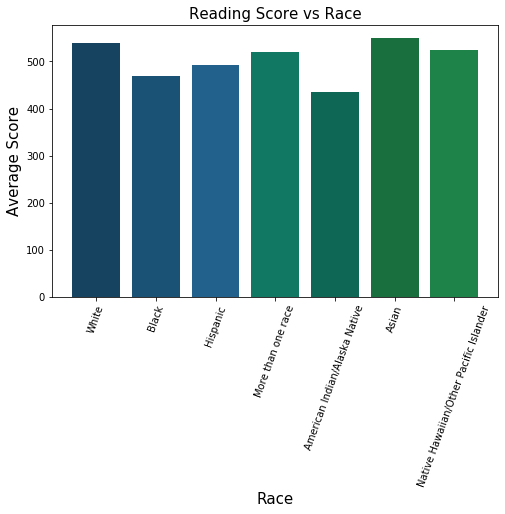

In [10]:
# list of colors for our bars
colors = ['#154360','#1A5276','#21618C','#117864','#0E6655','#196F3D','#1D8348']
plt.figure(figsize=(8,5))

# variable i which will iterate through our colors list
i = 0

for race in races:
    # grab the average score for the current race
    average_score = df[df[race]==1][['readingScore']].mean()
    # add a bar to our plot
    plt.bar(x=race,height=average_score,color=colors[i])
    # incrementing our counter
    i += 1
    
plt.xticks(rotation=70)
plt.title('Reading Score vs Race',fontsize=15)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Average Score',fontsize=15)

#### How minutes per week in English class affects reading score:

Text(0, 0.5, 'Score')

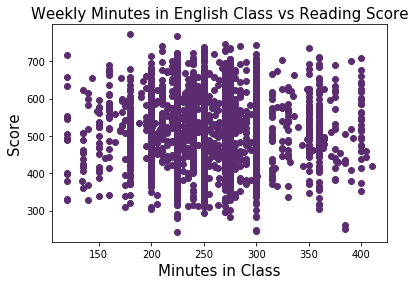

In [11]:
plt.scatter(x='minutesPerWeekEnglish',y='readingScore',data=df,color='#5B2C6F')
plt.title('Weekly Minutes in English Class vs Reading Score',fontsize=15)
plt.xlabel('Minutes in Class',fontsize=15)
plt.ylabel('Score',fontsize=15)

It looks like there is no obvious correlation between minutes in class and reading score

#### 95% Confidence Interval for Mean of Population Reading Score

In [18]:
sample_mean = df['readingScore'].mean()
sample_std = df['readingScore'].std()
conf_int = stats.norm.interval(.95,sample_mean,sample_std)

print(f"We are 95% certain the population mean is a value in the range {round(conf_int[0],2)} - {round(conf_int[1],2)}.")

We are 95% certain the population mean is a value in the range 350.98 - 696.12.


This makes sense as the range of scores for the PISA reading test is 0 - 1,000.

## Tests

Before starting our experiments, we need to know how many observations we need in order to attain a power of 0.8 given an alpha of .05.

In [21]:
effect_size = 0.8
alpha = 0.05
power = 0.8
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)

sample_size

25.52457250047935

From our observations, we want to conduct some hypothesis tests. The following groups were tested to see if there is a statistically significant difference in their reading scores.

*Alternative Hypothesis*: There is a statistically significant difference in the reading scores of these groups.

*Null Hypothesis*: There is no statistically significant difference between the reading scores of these groups.

#### Students who attend public school vs those who don't:

In our observations we noted that the mean reading score of students who attend public school was lower than that of those who don't. 

In [28]:
t_statistic, p_value = ttest_ind(public_school['readingScore'],non_public_school['readingScore'],equal_var=False)

print(f"P-value: {p_value}")

if p_value < alpha/2:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

P-value: 3.507292993399989e-09
We reject the null hypothesis.


This test shows us this difference is statistically significant.

#### Students with a parent from the US vs those without one:

In our observations we noted that the mean reading score of students with a parent who was born in the US was higher than that of those who don't. 

In [30]:
t_statistic, p_value = ttest_ind(us_parent['readingScore'],non_us_parents['readingScore'],equal_var=False)

print(f"P-value: {p_value}")

if p_value < alpha/2:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

P-value: 2.941312755968199e-06
We reject the null hypothesis.


This test shows us this difference is statistically significant.